In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
## set parameters
encoding = "ode" ## ohe for one hot encoding and ode for ordinal
dropout_val = 0.1

In [ ]:
## Drop agecode b/c it is redundant
df = pd.read_csv('psychotic.csv')
df.drop('agecode', axis=1, inplace=True)
targets = ['Insominia', 'shizopherania', 'vascula_demetia', 'MBD', 'Bipolar']
features = [x for x in df.columns if x not in targets]

In [ ]:
## Extract first letter of targets and convert to binary
for col in targets:
    df[col] = df[col].str[:1].map({'P': 1, 'N': 0})

In [ ]:
## encode all categorical variables
## Convert to X/y dataset
if encoding == "ohe":
    ohe = OneHotEncoder(drop='first', sparse=False)
    categ_np = ohe.fit_transform(df[features].drop('age', axis=1))
elif encoding == "ode":
    ode = OrdinalEncoder()
    categ_np = ode.fit_transform(df[features].drop('age', axis=1))

In [ ]:
## Append age column
X = np.append(categ_np, np.array(df['age']).reshape((500, 1)), 1)
y = np.array(df[targets])

In [ ]:
## Split into 70/30 train/val dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1234)

## Multi-label Prediction

In [ ]:
## 20-20-40 w/ relu and sigmoid activation functions
## dropout layers defined by dropout value
model = Sequential()
model.add(Dense(20, input_shape=(X_train.shape[1], ), activation="relu"))
model.add(Dropout(dropout_val))
model.add(Dense(20, activation="relu"))
model.add(Dropout(dropout_val))
model.add(Dense(40, activation="relu"))
model.add(Dropout(dropout_val))
model.add(Dense(5, activation="sigmoid"))

In [ ]:
## 0.01 adam optimizer with binary cross entropy as the loss
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val))

Epoch 1/40
11/11 [==============================] - 0s 12ms/step - loss: 0.8550 - accuracy: 0.3571 - val_loss: 0.7114 - val_accuracy: 0.5200
Epoch 2/40
11/11 [==============================] - 0s 4ms/step - loss: 0.6676 - accuracy: 0.4000 - val_loss: 0.6277 - val_accuracy: 0.2800
Epoch 3/40
11/11 [==============================] - 0s 4ms/step - loss: 0.6390 - accuracy: 0.4257 - val_loss: 0.6235 - val_accuracy: 0.5200
Epoch 4/40
11/11 [==============================] - 0s 4ms/step - loss: 0.6200 - accuracy: 0.5400 - val_loss: 0.6016 - val_accuracy: 0.5267
Epoch 5/40
11/11 [==============================] - 0s 4ms/step - loss: 0.6162 - accuracy: 0.5571 - val_loss: 0.5868 - val_accuracy: 0.5267
Epoch 6/40
11/11 [==============================] - 0s 4ms/step - loss: 0.6061 - accuracy: 0.5514 - val_loss: 0.5725 - val_accuracy: 0.5267
Epoch 7/40
11/11 [==============================] - 0s 4ms/step - loss: 0.5939 - accuracy: 0.5800 - val_loss: 0.5676 - val_accuracy: 0.5333
Epoch 8/40
11/11 [=

Text(0.5, 1.0, 'Loss')

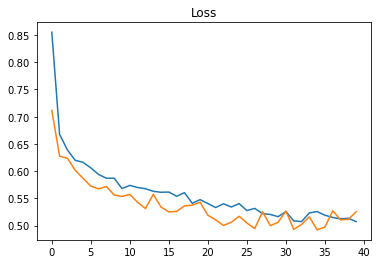

In [ ]:
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

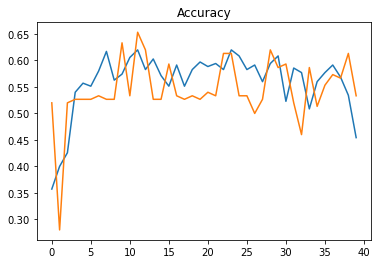

In [ ]:
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.title("Accuracy")

## Single-label Prediction

In [ ]:
single_pred = "bipolar" ## used to choose single label prediction based on dictionary below

target_dict = {'insomnia': 0, 'schizophrenia': 1, 'vascular_demetia': 2, 'adhd': 3, 'bipolar': 4}
col = target_dict[single_pred]

In [ ]:
## Define same model structure
model = Sequential()
model.add(Dense(20, input_shape=(X_train.shape[1], ), activation="relu"))
model.add(Dropout(dropout_val))
model.add(Dense(20, activation="relu"))
model.add(Dropout(dropout_val))
model.add(Dense(40, activation="relu"))
model.add(Dropout(dropout_val))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train[:, col], epochs=40, validation_data=(X_val, y_val[:, col]))

Epoch 1/40
11/11 [==============================] - 0s 12ms/step - loss: 0.8887 - accuracy: 0.5286 - val_loss: 0.7785 - val_accuracy: 0.5533
Epoch 2/40
11/11 [==============================] - 0s 4ms/step - loss: 0.7170 - accuracy: 0.6057 - val_loss: 0.6495 - val_accuracy: 0.6400
Epoch 3/40
11/11 [==============================] - 0s 4ms/step - loss: 0.6709 - accuracy: 0.6314 - val_loss: 0.6805 - val_accuracy: 0.5533
Epoch 4/40
11/11 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.6686 - val_loss: 0.6387 - val_accuracy: 0.7000
Epoch 5/40
11/11 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6714 - val_loss: 0.6408 - val_accuracy: 0.6133
Epoch 6/40
11/11 [==============================] - 0s 4ms/step - loss: 0.6349 - accuracy: 0.6486 - val_loss: 0.6260 - val_accuracy: 0.6867
Epoch 7/40
11/11 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.6257 - val_loss: 0.6326 - val_accuracy: 0.6600
Epoch 8/40
11/11 [=

In [ ]:
pred = model.predict(X_val)
accuracy = (np.round(pred) == y_val[:, col].reshape((-1, 1))).sum()/len(y_val)

5/5 [==============================] - 0s 1ms/step


In [ ]:
print(single_pred)
print("Accuracy: " + str(accuracy))

bipolar
Accuracy: 0.7066666666666667


In [ ]:
## Code to run all five targets
for single_pred in target_dict.keys():
    col = target_dict[single_pred]
    
    model = Sequential()
    model.add(Dense(20, input_shape=(X_train.shape[1], ), activation="relu"))
    model.add(Dropout(dropout_val))
    model.add(Dense(20, activation="relu"))
    model.add(Dropout(dropout_val))
    model.add(Dense(40, activation="relu"))
    model.add(Dropout(dropout_val))
    model.add(Dense(1, activation="sigmoid"))
    
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train[:, col], epochs=40, validation_data=(X_val, y_val[:, col]), verbose=0)
    
    pred = model.predict(X_val, verbose=0)
    accuracy = (np.round(pred) == y_val[:, col].reshape((-1, 1))).sum()/len(y_val)
    
    print(single_pred)
    print("accuracy: " + str(accuracy))
    print()

insomnia
accuracy: 0.66

schizophrenia
accuracy: 0.9466666666666667

vascular_demetia
accuracy: 0.8066666666666666

adhd
accuracy: 0.7533333333333333

bipolar
accuracy: 0.6533333333333333



In [ ]:
max_target_sample = df_target_count['target'].max()
target_list = df_target_count['index'].tolist() #target list for oversample to max_target_sample
Y_smote = np.empty((0))
X_smote =  np.empty((0, 11)) #hardcode no of features

for target in target_list:
    df1 = df_filter.loc[df_filter['target'] == target]

    # split features and target
    X = df1.drop(['Insominia', 'shizopherania', 'vascula_demetia', 'MBD', 'Bipolar', 'Insominia_enc', 'shizopherania_enc', 'vascula_demetia_enc', 'MBD_enc', 'Bipolar_enc', 'target', 'agecode'], axis=1)
    feature_category = X.columns.tolist()

    X_array = X.to_numpy()
    Y = [target] * max_target_sample

    sm = SMOTE(X_array, k_neigh = 5, random_state = SEED).fit()
    samples = sm.sample(max_target_sample)
    # print(samples.shape, len(Y), target)

    # append to final X features and Y target
    X_smote = np.append(X_smote, samples, 0)
    Y_smote = np.append(Y_smote, Y, 0)

Y_smote = np.vectorize(target_dict.get)(Y_smote)

In [ ]:
class SMOTE:
    # apply SMOTE
    # https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50
    # https://github.com/dialnd/imbalanced-algorithms/blob/master/smote.py
    # https://scikit-learn.org/stable/modules/neighbors.html
    """Implementation of Modified Synthetic Minority Over-Sampling Technique (SMOTE)

    Parameters
    ----------
    X : array-like , shape = [n_samples, n_features]
        Original data before oversampling
    k_neighbors : int, optional (default=5)
        Number of nearest neighbors.
    random_state : int or optional (default=123)
    
    """
    def __init__(self, X, k_neigh = 5, random_state = 123):
        self.X = X

        self.k_neigh = k_neigh
        self.random_state = random_state

    def fit(self):
        """Train KNN model with input data"""
        
        # Learn nearest neighbors.
        self.neigh = NearestNeighbors(n_neighbors=self.k_neigh).fit(self.X)
        return self
    
    def sample(self, n_sample):
        """Generate samples to n_sample amount.

        Parameters
        ----------
        n_samples : int
            Number of new synthetic samples.
        Returns
        -------
        sample : array, shape = [n_samples, n_features]
            Returns synthetic samples.
        """
        np.random.seed(seed=self.random_state)
        if (self.X.shape[0] >= n_sample):
            S = self.X[:n_sample, :]
            
            return S

        #initialise array for samples
        S = np.zeros(shape=(n_sample, self.X.shape[1]))
        for i in range(n_sample):
            rand = np.random.random(1)[0]
            j = np.random.randint(0, self.X.shape[0]) #random index of minority sample

            # Find the NN for each sample. Remove sample from indice
            _ , indice = self.neigh.kneighbors(self.X[j].reshape(1, -1))
            indice = indice[:, 1:]

            knn_index = np.random.choice(indice[0])
            # print(j, indice, knn_index, self.X[j].reshape(1, -1))
            diff = self.X[knn_index] - self.X[j]
            S[i, :] = self.X[j, :] + rand * diff[:]

        return S